In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=f3e457feffd024493dc047d1394dcc4775b68e6febde95920f4a3c5ab743cdb3
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
h2o.init()

In [ ]:
train = pd.read_csv("/content/train_0223.csv")
test = pd.read_csv("/content/test_0223.csv")
#train.drop(['is_converted','customer_idx','lead_onwer',''],axis=1,inplace=True)


,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,ratio_rate,log_ratio_rate,gob1,gob2,gob3,gob4,gob5,gob6,cluster_1,cluster_2
0,1.0,126,0,0.066667,23019,8,0,NaN,0.0,0.0,...,8.718132,2.273993,0.581209,540.524210,NaN,NaN,4.133333,NaN,2.0,1.0
1,1.0,126,0,0.066667,14809,8,0,12.0,0.0,0.0,...,8.718132,2.273993,0.581209,836.940712,104.617589,1152.0,6.400000,0.8,2.0,0.0
2,1.0,73,0,0.088889,9696,8,0,144.0,0.0,0.0,...,8.718132,2.273993,0.774945,488.215415,1255.411068,8064.0,4.977778,12.8,2.0,1.0
3,1.0,73,0,0.088889,37024,8,0,NaN,0.0,0.0,...,8.718132,2.273993,0.774945,383.597826,NaN,NaN,3.911111,NaN,2.0,1.0
4,1.0,73,0,0.088889,9310,21,0,NaN,0.0,0.0,...,8.718132,2.273993,0.774945,845.658845,NaN,NaN,8.622222,NaN,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11666,1.0,73,2,NaN,26430,25,0,NaN,0.0,0.0,...,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,2.0,1.0
11667,1.0,73,2,NaN,20971,25,0,NaN,0.0,0.0,...,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,2.0,1.0
11668,1.0,73,2,NaN,29941,25,0,NaN,0.0,0.0,...,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,2.0,1.0
11669,1.0,73,2,NaN,11141,25,0,NaN,0.0,0.0,...,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,2.0,2.0


In [ ]:
train = pd.read_csv("/content/train_0223.csv")
test = pd.read_csv("/content/test_0223.csv")

train.drop(['is_converted'],axis=1,inplace=True)

train = train.fillna(0)
test = test.fillna(0)

#train = train.iloc[:100,:]

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)
train

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,customer_job,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,raw_product_category,product_category_2,write_budget,bant_submit_zegob,raw_country,Field,City,Country,oran,ohio,valencia,com_reg_ver_win_rate_zegob,as_strategic_ver,asit_strategic_ver,asid_strategic_ver,iditas_strategic_ver,New_Customer,is_endcustomer,is_Partner,HEC_Group,log_lead_desc_length,sqrt_lead_desc_length,Commercial_Display,IT_PRODUCTS,HVAC_ESS,Other,Respone_Corporate_Continent,Expected_Timeline_Quantification,Corporate_Weight,Business_Area_Main,Business_Subarea_Main,enterprise_country,country_corp,high_level,business_unit_area,corporate_unit,job_product,country_corp_status,country_corp_status_1,country_corp_status_2,ratio_rate,log_ratio_rate,gob1,gob2,gob3,gob4,gob5,gob6,cluster_1,cluster_2
1,126,0,0.0666667,23019,8,0,0,0,0,0,274,62,24,62,143,684,30,33,5,1,0,0.00307929,0.0268456,1,27,0,181,62,1,1,6923,0,6664,589,0,0,0,0.00444444,1,1,1,1,0,1,0,0,4.14313,7.87401,0,0,1,0,1,1,8.8,1,1,229,325,0,1,90,1257,1,1,0,8.71813,2.27399,0.581209,540.524,0,0,4.13333,0,2,1
1,126,0,0.0666667,14809,8,0,12,0,0,0,208,96,24,62,143,684,12,33,5,1,0,0.00307929,0.0268456,1,0,1,181,62,1,1,6553,0,6312,589,0,0,0,0.00444444,1,1,1,1,1,1,0,1,4.57471,9.79796,0,0,1,0,1,1,8.8,1,1,229,325,1,1,90,901,1,1,0,8.71813,2.27399,0.581209,836.941,104.618,1152,6.4,0.8,2,0
1,73,0,0.0888889,9696,8,0,144,0,0,0,102,56,23,64,145,686,57,21,5,1,0,0.00307929,0.0268456,1,16,2277,238,64,1,1,4523,0,4342,335,0,0,0,0.00790123,1,1,1,1,1,1,0,4,4.04305,7.48331,0,0,1,0,1,1,8.8,1,1,134,190,0,1,56,488,1,1,0,8.71813,2.27399,0.774945,488.215,1255.41,8064,4.97778,12.8,2,1
1,73,0,0.0888889,37024,8,0,0,0,0,0,104,44,24,65,146,687,12,21,5,1,0,0.00307929,0.0268456,1,41,2386,318,65,1,1,1461,0,1290,335,0,0,0,0.00790123,1,1,1,1,0,1,0,0,3.80666,6.63325,0,0,1,0,1,1,8.8,1,1,134,190,1,1,56,551,1,1,0,8.71813,2.27399,0.774945,383.598,0,0,3.91111,0,2,1
1,73,0,0.0888889,9310,21,0,0,0,0,0,56,97,24,62,143,684,57,21,5,0,0,0.00307929,0.0268456,1,57,2492,181,62,1,1,3820,0,3678,335,0,0,0,0.00790123,1,1,1,1,0,0,0,0,4.58497,9.84886,0,0,1,0,1,1,8.8,1,0,134,190,0,1,56,331,1,1,0,8.71813,2.27399,0.774945,845.659,0,0,8.62222,0,2,0
1,118,0,0.0408163,8582,8,1,0,0,0,0,270,1114,24,54,135,676,44,0,5,1,0,0.00307929,0.0268456,1,27,2601,45,54,1,1,431,0,305,516,0,0,0,0.00166597,1,1,1,1,0,1,0,0,7.01661,33.3766,0,0,1,0,0,1,0.1,1,1,214,293,1,1,0,1206,1,1,2,8.71813,2.27399,0.355842,9712,0,0,45.4694,0,0,0
0.75,136,0,0.0408163,12566,8,1,0,0,0,0,102,420,24,64,145,686,44,41,4,1,0,0.00307929,0.0268456,1,27,2710,238,64,0,0.5625,4169,0,3998,692,0,0,0,0.00166597,1,1,1,1,0,1,0,0,6.04263,20.4939,0,0,1,0,5,0,0.1,1,1,249,353,1,1,112,488,1,1,0,8.71813,2.27399,0.355842,3661.62,0,0,17.1429,0,1,0
1,73,0,0.0888889,10096,8,1,0,0,0,0,231,205,24,65,146,687,57,21,5,1,0,0.00307929,0.0268456,1,50,2820,318,65,1,1,3595,0,3428,335,0,0,0,0.00790123,1,1,1,1,0,1,0,0,5.32788,14.3178,0,0,1,0,1,1,8.8,1,1,135,190,0,1,56,1004,1,1,0,8.71813,2.27399,0.774945,1787.22,0,0,18.2222,0,1,0
0.75,126,0,0.0666667,21810,21,0,3,0,0,0,237,103,24,62,143,684,88,33,5,0,0,0.00307929,0.0268456,1,16,2928,181,62,0,0.5625,2162,0,1956,589,0,0,0,0.00444444,1,1,1,1,1,0,0,5,4.64439,10.1489,0,0,1,0,1,1,8.8,1,1,229,325,1,1,90,1067,1,1,0,8.71813,2.27399,0.581209,897.968,26.1544,309,6.86667,0.2,2,0
0.75,73,0,0.0888889,38066,8,1,0,0,0,0,237,252,24,65,146,687,44,21,0,1,0,0.00307929,0.0268456,1,57,3027,318,65,0,0.5625,3678,0,2528,335,0,0,0,0.00790123,1,1,1,1,0,1,0,0,5.53339,15.8745,0,0,1,0,1,2,8.8,1,0,135,190,1,1,56,1069,1,1,0,8.71813,2.27399,0.774945,2196.97,0,0,22.4,0,1,0


In [ ]:
model = H2OAutoEncoderEstimator(epochs=100, hidden=[50, 20, 50], activation="Tanh", l1=0 , seed = 313, shuffle_training_data= False, reproducible = True) #313
#model = H2OAutoEncoderEstimator(epochs=500, hidden=[50, 20, 50], activation="Tanh", l1=0 , seed = 313, shuffle_training_data= False, reproducible = True) #313
'''
model = H2OAutoEncoderEstimator(
    epochs=500,  # 에폭 수
    hidden=[50, 20, 50],  # 숨겨진 레이어의 노드 수
    activation="TanhWithDropout",  # 활성화 함수
    l1=0,  # L1 정규화
    seed=313,  # 랜덤 시드 값
    shuffle_training_data=False,  # 훈련 데이터 셔플 여부
    reproducible=True,  # 재현성 확보
    autoencoder=True,  # AutoEncoder 설정
    adaptive_rate=True,  # 적응형 학습률 사용
    rho=0.99,  # 업데이트 감소율
    epsilon=1e-8,  # 안정성 상수
    rate_annealing=1e-6,  # 학습률 점진 감소
    momentum_start=0.5,  # 초기 모멘텀 값
    momentum_ramp=10000,  # 모멘텀 증가 기간
    momentum_stable=0.99,  # 안정된 모멘텀 값
    nesterov_accelerated_gradient=True,  # Nesterov 가속 사용
    input_dropout_ratio=0.2,  # 입력 드롭아웃 비율
    hidden_dropout_ratios=[0.2, 0.2, 0.2],  # 숨겨진 레이어 드롭아웃 비율
    max_w2=10.0  # 가중치 제곱 최대값
)
'''
#model = H2OAutoEncoderEstimator() #313

model.train(training_frame=train)
predictions = model.anomaly(test).as_data_frame()
predictions

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


,Reconstruction.MSE
0,0.007237
1,0.008203
2,0.007503
3,0.006650
4,0.006842
...,...
5266,0.004497
5267,0.007641
5268,0.005873
5269,0.004269


In [ ]:
predictions[predictions['Reconstruction.MSE'] > 0.065]

,Reconstruction.MSE
100,0.069732
235,0.081833
352,0.079819
582,0.067338
873,0.101092
1198,0.081683
1401,0.065530
1628,0.065457
2131,0.066726
2643,0.077986


In [ ]:
threshold = np.quantile(predictions, 0.955)
predictions["is_anomaly"] = 0
predictions["is_anomaly"][predictions["Reconstruction.MSE"] > threshold] = 1
#predictions["is_anomaly"][predictions["Reconstruction.MSE"] < threshold] = 0
predictions = predictions.reset_index(drop = True)

<ipython-input-32-98887d8c1d8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions["is_anomaly"][predictions["Reconstruction.MSE"] > threshold] = 1


Reconstruction.MSE


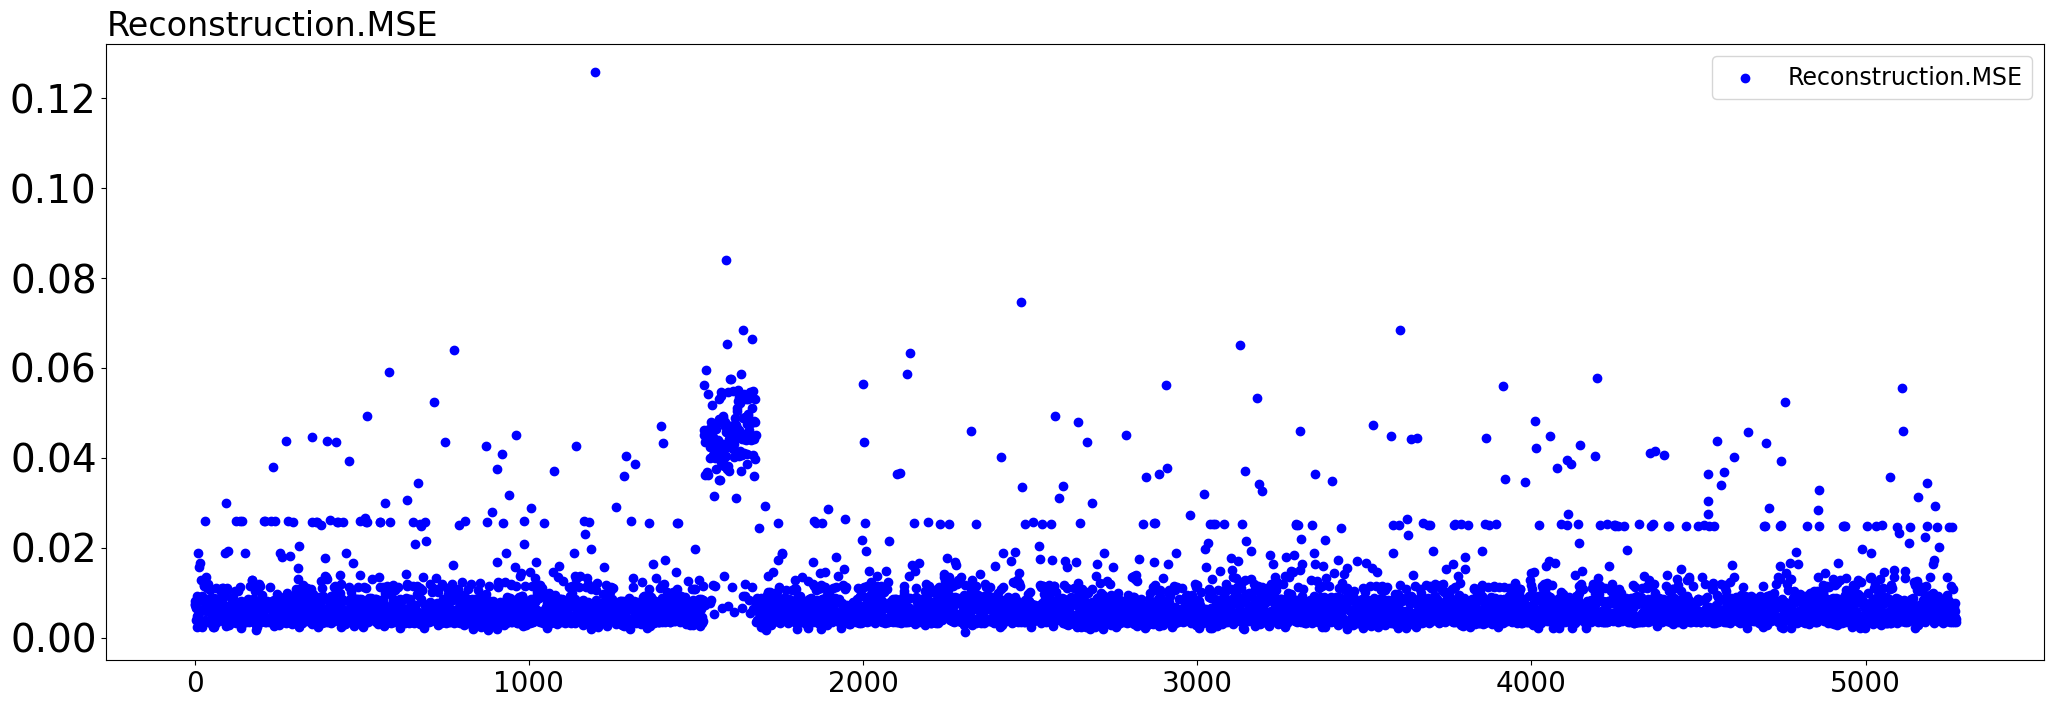

In [ ]:
for col in predictions.columns[:1]:
    try:
        print(col)
        target_1 = predictions.loc[:,col]

        plt.figure(figsize=(25,8))
        plt.scatter(target_1.index, target_1, label=col, color='b')
        plt.legend(fontsize=17)

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=28)
        plt.title(col, fontsize=24, loc='left')  # 타이틀 왼쪽 정렬
        plt.show()
    except:
        continue

Reconstruction.MSE


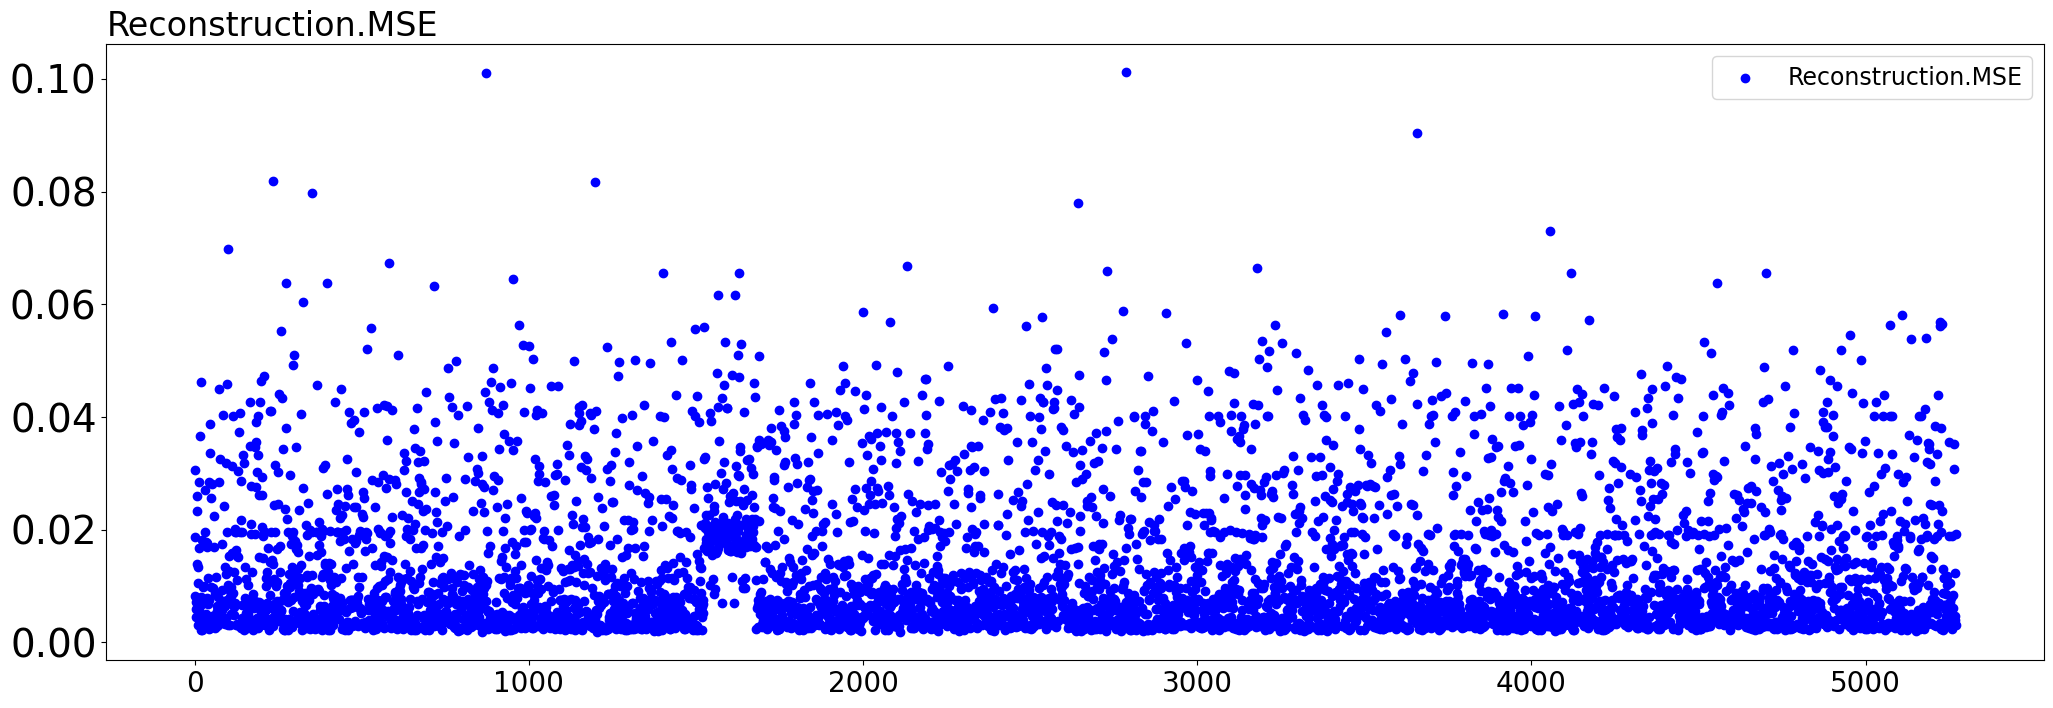

In [ ]:
for col in predictions.columns[:1]:
    try:
        print(col)
        target_1 = predictions.loc[:,col]

        plt.figure(figsize=(25,8))
        plt.scatter(target_1.index, target_1, label=col, color='b')
        plt.legend(fontsize=17)

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=28)
        plt.title(col, fontsize=24, loc='left')  # 타이틀 왼쪽 정렬
        plt.show()
    except:
        continue

Reconstruction.MSE


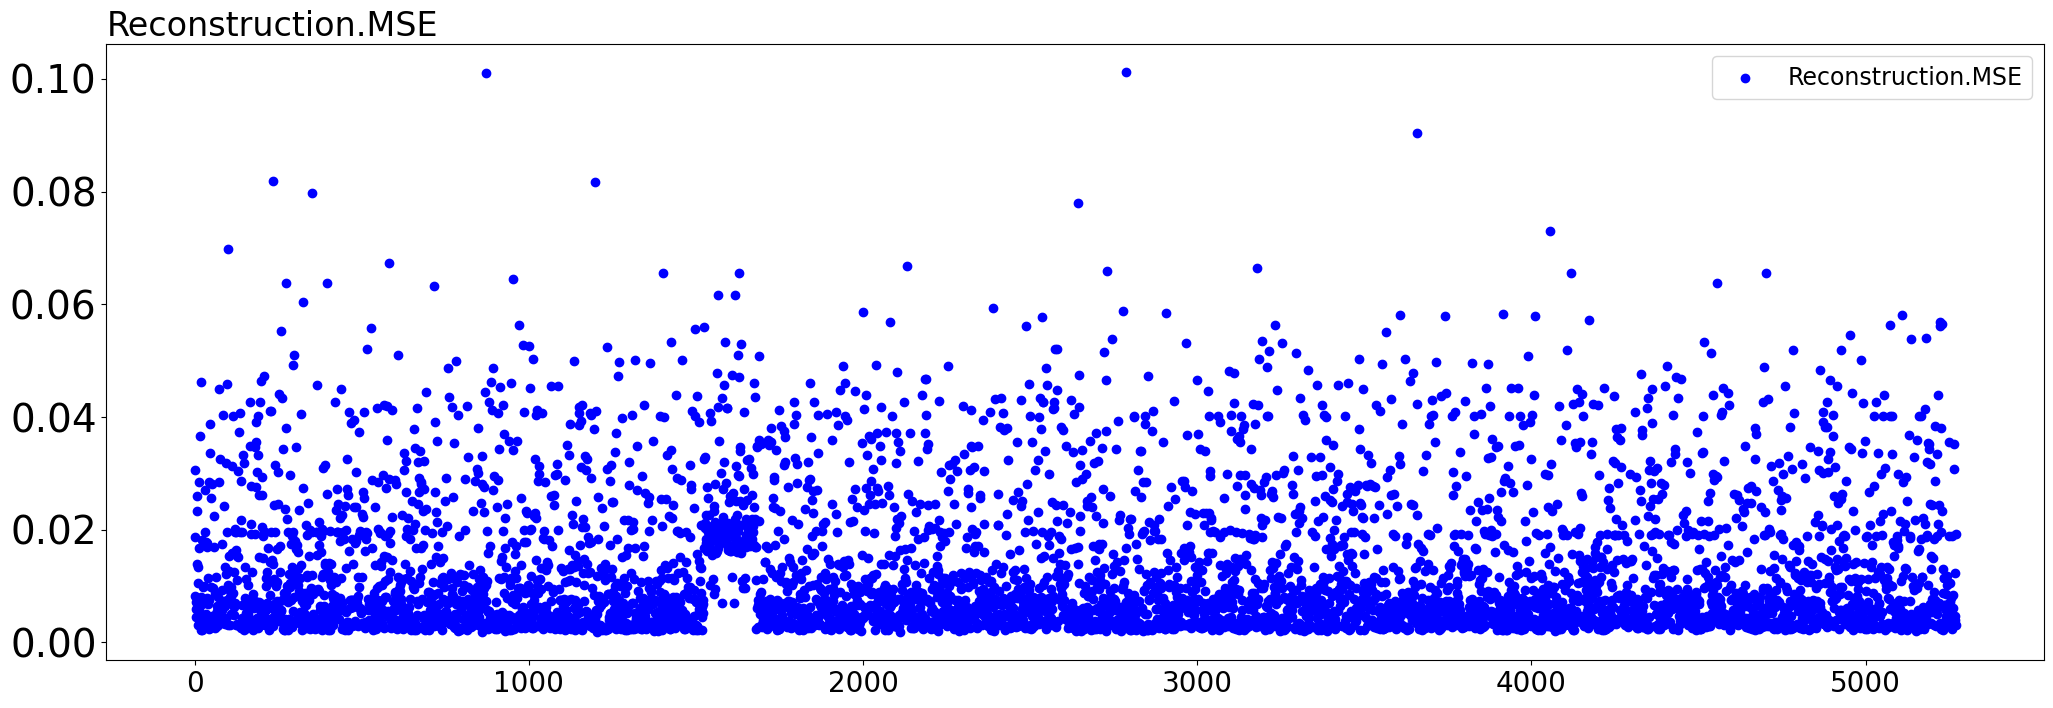

In [ ]:
for col in predictions.columns[:1]:
    try:
        print(col)
        target_1 = predictions.loc[:,col]

        plt.figure(figsize=(25,8))
        plt.scatter(target_1.index, target_1, label=col, color='b')
        plt.legend(fontsize=17)

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=28)
        plt.title(col, fontsize=24, loc='left')  # 타이틀 왼쪽 정렬
        plt.show()
    except:
        continue

Reconstruction.MSE


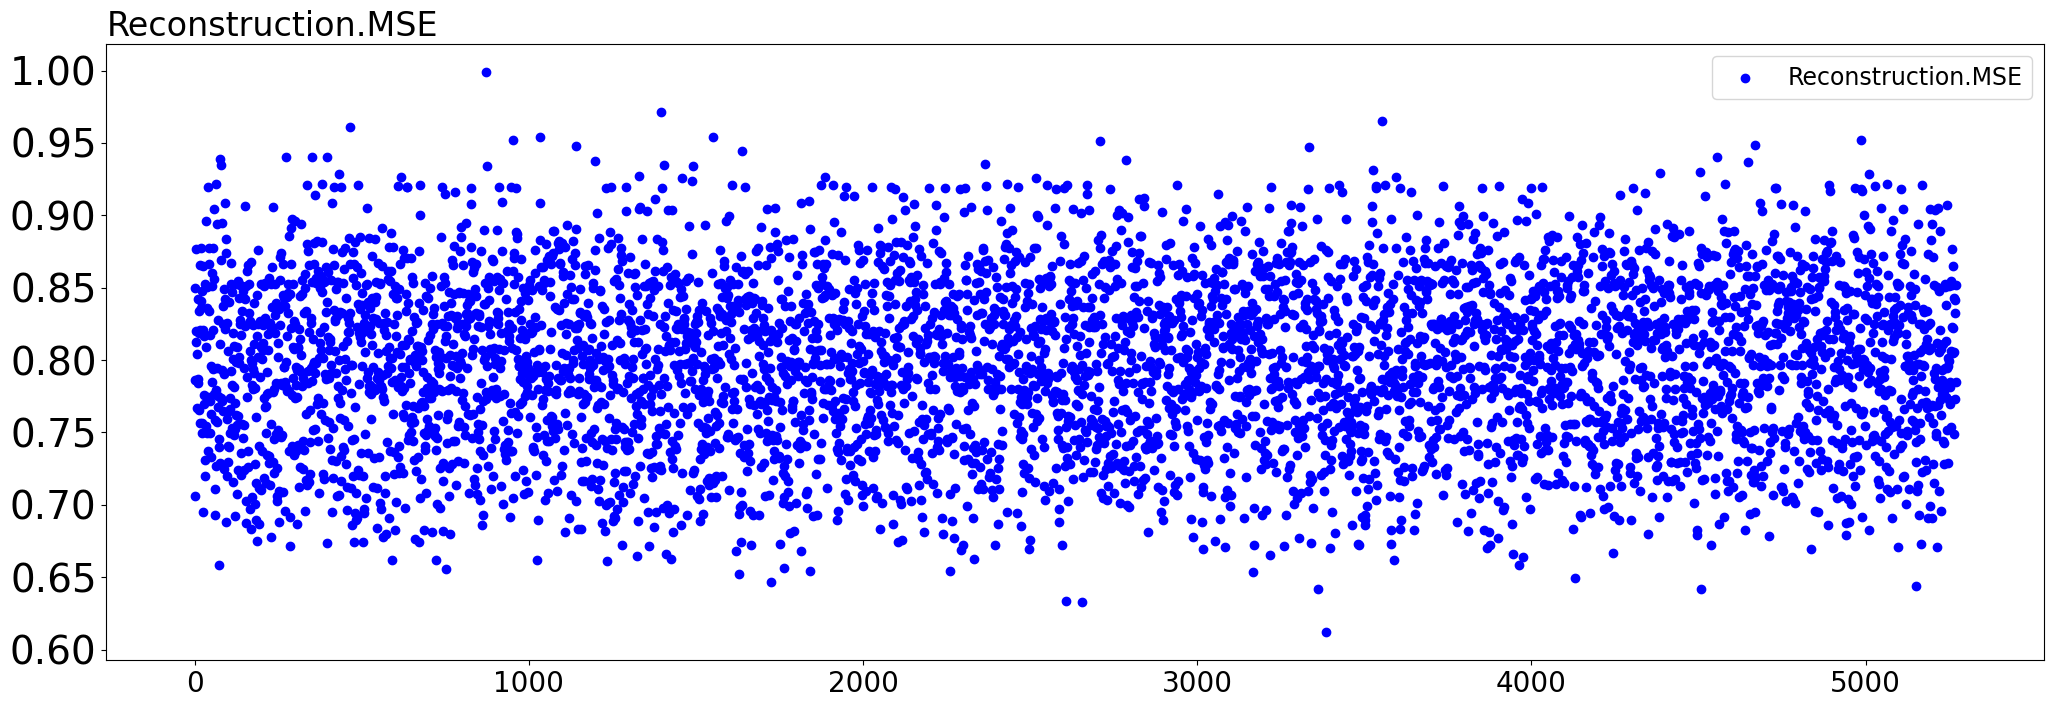

In [ ]:
for col in predictions.columns[:1]:
    try:
        print(col)
        target_1 = predictions.loc[:,col]

        plt.figure(figsize=(25,8))
        plt.scatter(target_1.index, target_1, label=col, color='b')
        plt.legend(fontsize=17)

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=28)
        plt.title(col, fontsize=24, loc='left')  # 타이틀 왼쪽 정렬
        plt.show()
    except:
        continue

# IF

In [ ]:
import h2o
from h2o.estimators import H2OIsolationForestEstimator

h2o.init()

train = pd.read_csv("/content/train_775_result.csv")
test = pd.read_csv("/content/test_775_result.csv")

train.drop(['is_converted'],axis=1,inplace=True)

train = train.fillna(0)
test = test.fillna(0)

#train = train.iloc[:100,:]

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 53 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_y5ngod
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.870 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
model = H2OIsolationForestEstimator(ntrees=100, max_depth=5, seed=42)
model = H2OIsolationForestEstimator(
    ntrees=100,              # 생성할 트리의 개수. 더 많은 트리는 보통 더 나은 성능을 의미하지만, 계산 시간이 더 길어집니다.
    sample_size=256,         # 각 이상치 탐지 트리를 학습시키기 위해 무작위로 선택되는 데이터 포인트의 수.
    max_depth=8,             # 각 트리의 최대 깊이. 더 깊은 트리는 더 세밀한 분리를 가능하게 하지만, 오버피팅의 위험을 증가시킬 수 있습니다.
    seed=42,                 # 결과의 재현성을 위한 난수 생성기의 시드 값.
    min_rows=1,              # 트리의 노드를 분할할 때 필요한 최소 데이터 포인트 수.
    max_runtime_secs=0,      # 모델 학습에 허용된 최대 시간(초). 0은 제한이 없음을 의미합니다.
    stopping_rounds=0,       # 조기 중단을 위한 라운드 수. 특정 라운드 동안 성능이 향상되지 않으면 학습을 조기에 중단합니다.
    stopping_metric='auto',  # 조기 중단을 결정할 때 사용되는 메트릭.
    stopping_tolerance=0.001 # 조기 중단을 위한 성능 향상의 최소 허용 오차.
)

model.train(training_frame=train)
predictions = model.predict(test).as_data_frame()
predictions

isolationforest Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Stopping tolerance is ignored for _stopping_rounds=0.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████| (done) 100%
isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


,predict,mean_length
0,0.646552,5.50
1,0.422414,6.02
2,0.556034,5.71
3,0.206897,6.52
4,0.465517,5.92
...,...,...
5266,0.125000,6.71
5267,0.327586,6.24
5268,0.099138,6.77
5269,0.375000,6.13


predict


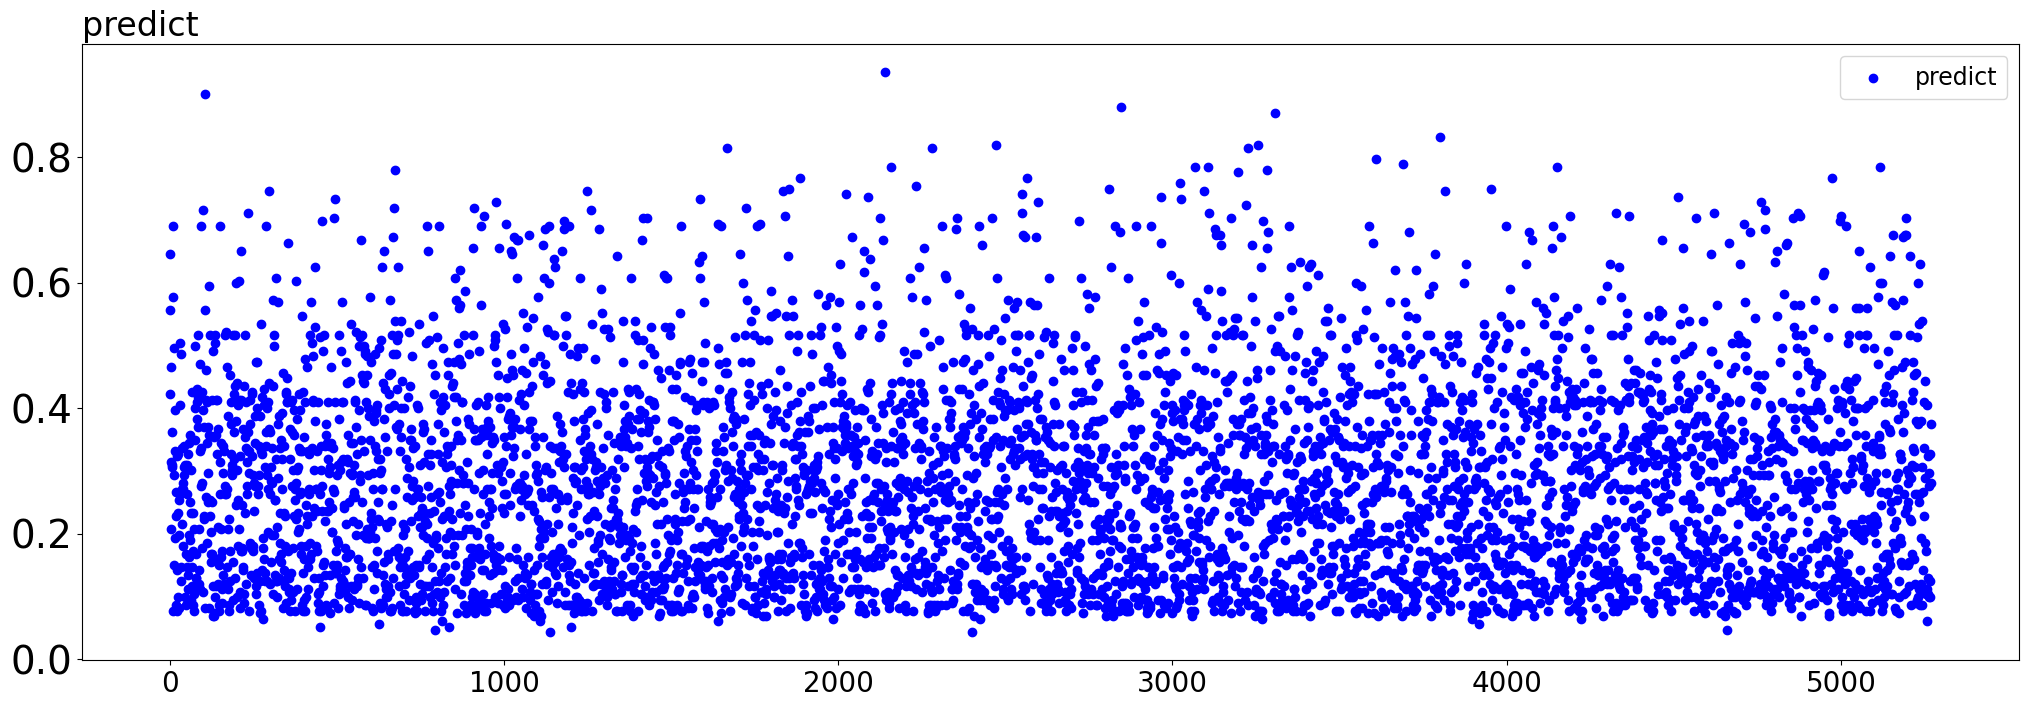

mean_length


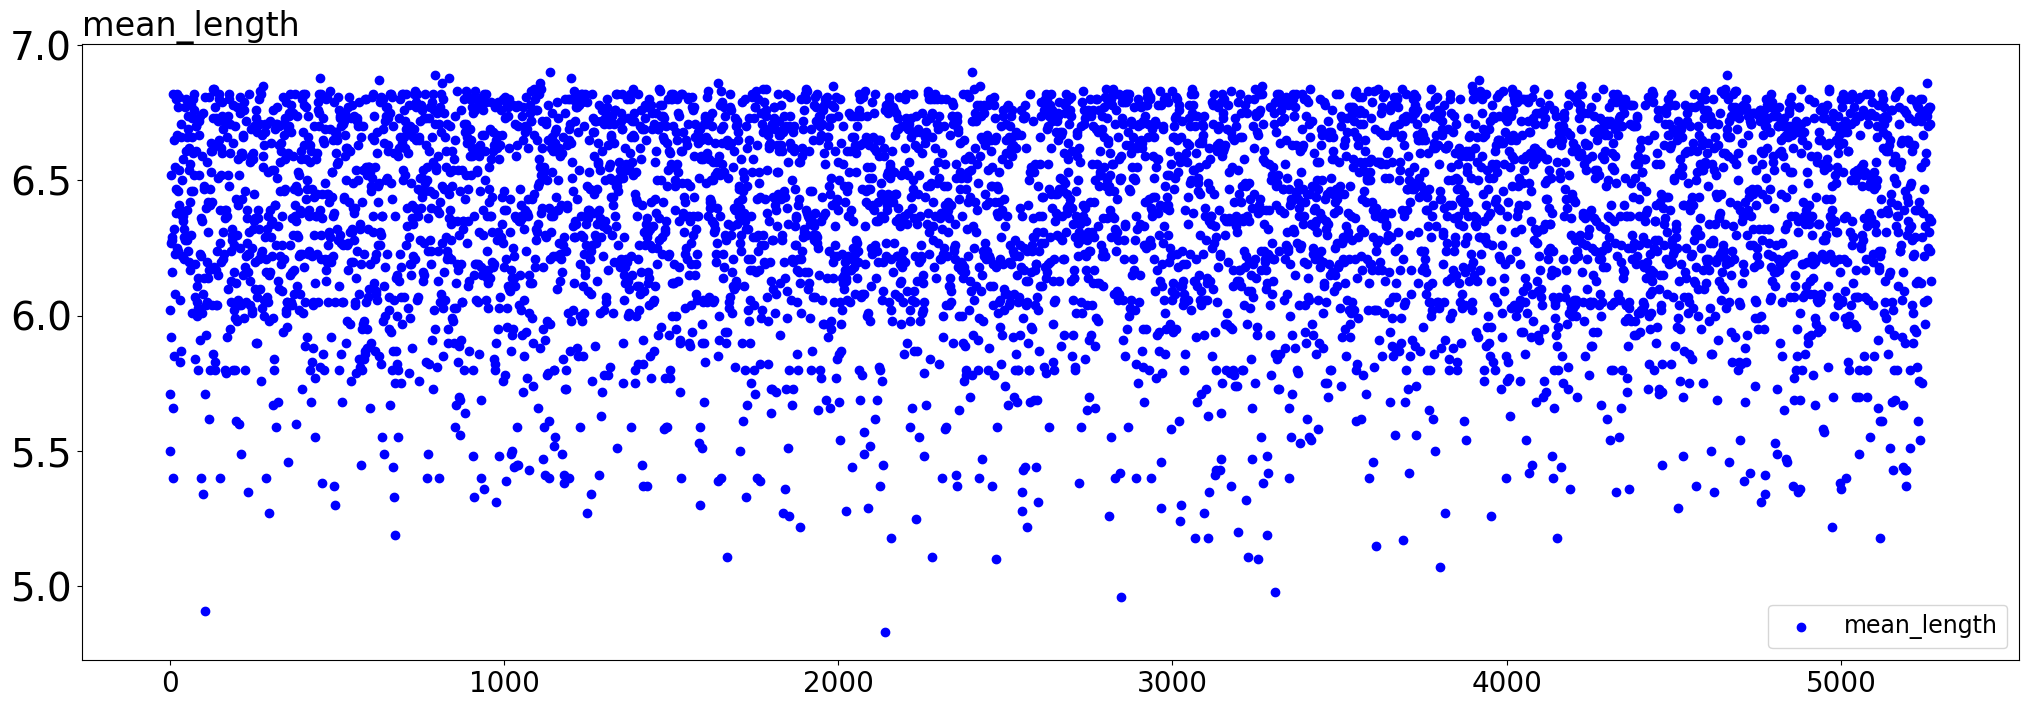

In [ ]:
for col in predictions.columns[:2]:
    try:
        print(col)
        target_1 = predictions.loc[:,col]

        plt.figure(figsize=(25,8))
        plt.scatter(target_1.index, target_1, label=col, color='b')
        plt.legend(fontsize=17)

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=28)
        plt.title(col, fontsize=24, loc='left')  # 타이틀 왼쪽 정렬
        plt.show()
    except:
        continue

predict


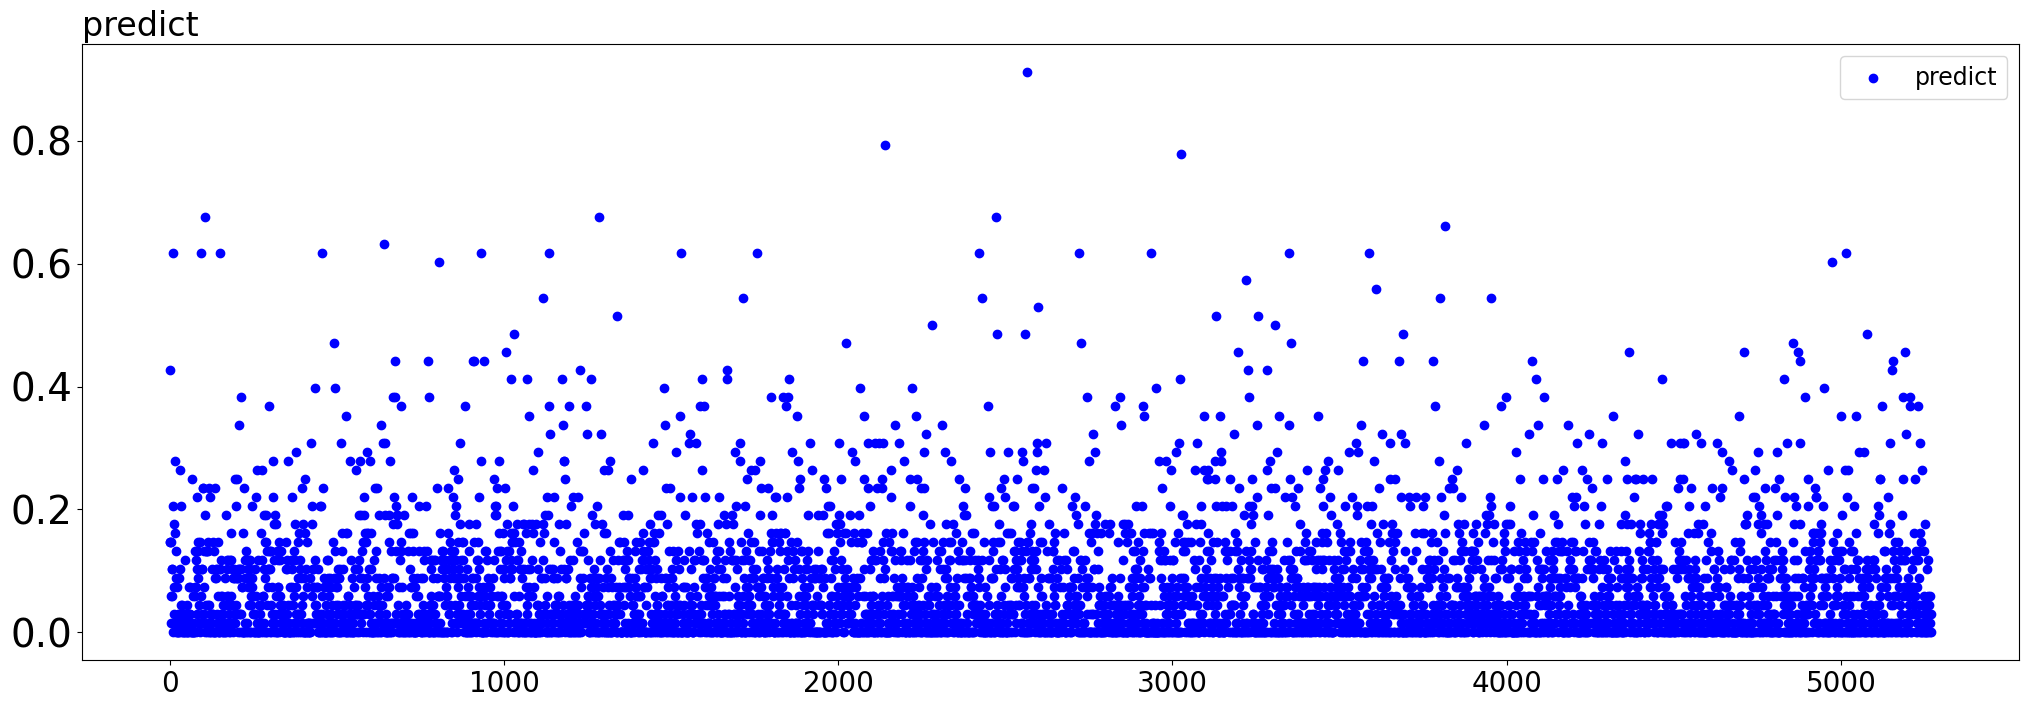

mean_length


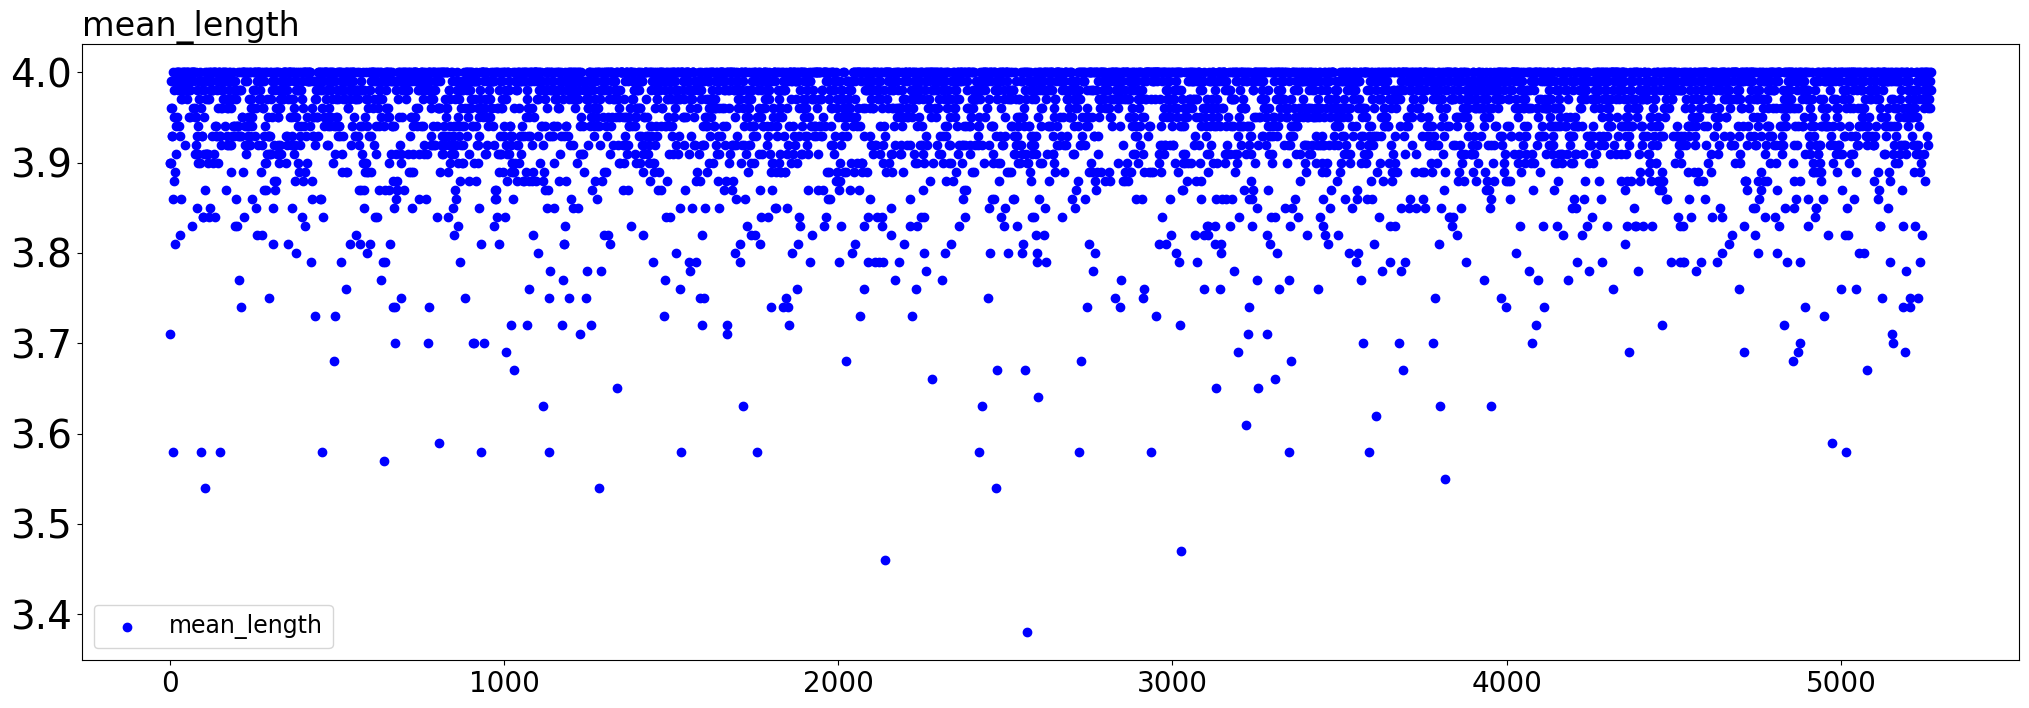

In [ ]:
for col in predictions.columns[:2]:
    try:
        print(col)
        target_1 = predictions.loc[:,col]

        plt.figure(figsize=(25,8))
        plt.scatter(target_1.index, target_1, label=col, color='b')
        plt.legend(fontsize=17)

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=28)
        plt.title(col, fontsize=24, loc='left')  # 타이틀 왼쪽 정렬
        plt.show()
    except:
        continue